# Лабораторная работа № 2
## Численное дифференцирование и интегрирование


### Постановка задачи:
Найти минимум унимодальной функции с помощью пяти различных методовНайти минимум унимодальной функции с помощью пяти различных методов

### Цели работы:
Изучить работу методов нахождения минимума унимодальной функции, вычислить наилучшие, продемонстрировать их преимущества и недостатки.

### Вариант 5
$$ e^{sin(x)}*x^2 $$

### Методы
Все методы построены по единому принципу: берутся две точки $x_1$ и $x_2$ такие, что $a < x_1 < x_2 < b$, находятся значения функции $f_1$ и $f_2$ в точках и сравниваются. Так как функция унимодальна на $[a, b]$, то:
* если $f_1 < f_2$, то точка минимума $x_{min}$ обязана быть меньше $x_2$, в противном случае унимодальность нарушится
* если $f_1 > f_2$, то $x_{min}$  обязана быть больше $x_1$

Сравнив $f_1$ и $f_2$, обновим интервал поиска, либо приравняв $b$ к $x_2$, либо $a$ к $x_1$. Повторяем итерации, пока не сузим интервал поиска до необходимой величины.
Некоторые реализации алгоритма позволяют сохранять значение одной из точек $x_1$ и $x_2$ и переиспользовать на следующей итерации, таким образом сокращая число подсчетов функции.


In [75]:
import math

In [76]:
def func1(x):
    return (math.e ** (math.sin(x))*x*x)
def func2(x):
    return (x - 1.0/6.0 * (x ** 3) + 1.0/200.0 * (x ** 5))
e = 0.01
a = -4 + e
b = 5 - e

#### Метод дихотомии:

In [77]:
def dichotomy(a, b, e, func):
    l, r = a, b
    n = 0
    while r - l > e:
        med = (l + r) / 2
        x1, x2 = med - e / 3, med + e / 3
        f1, f2 = func(x1), func(x2)
        n += 2
        if f1 < f2:
            r = x2
        else:
            l = x1
    #print("Dichotomy function calculations: ", n)        
    return (l + r) / 2

Описание алгоритма:
Берутся две крайние точки $l$ и $r$, вычисляется значение по $x$ середины между ними. От середины берутся слева и справа значения по $x$ на расстоянии $\frac{\xi}{3}$, вычисляется значение функции в этих двух точках, после чего значения сравниваются. Если левая точка ниже, правая становится новой правой границей, иначе левая становится новой левой границей.

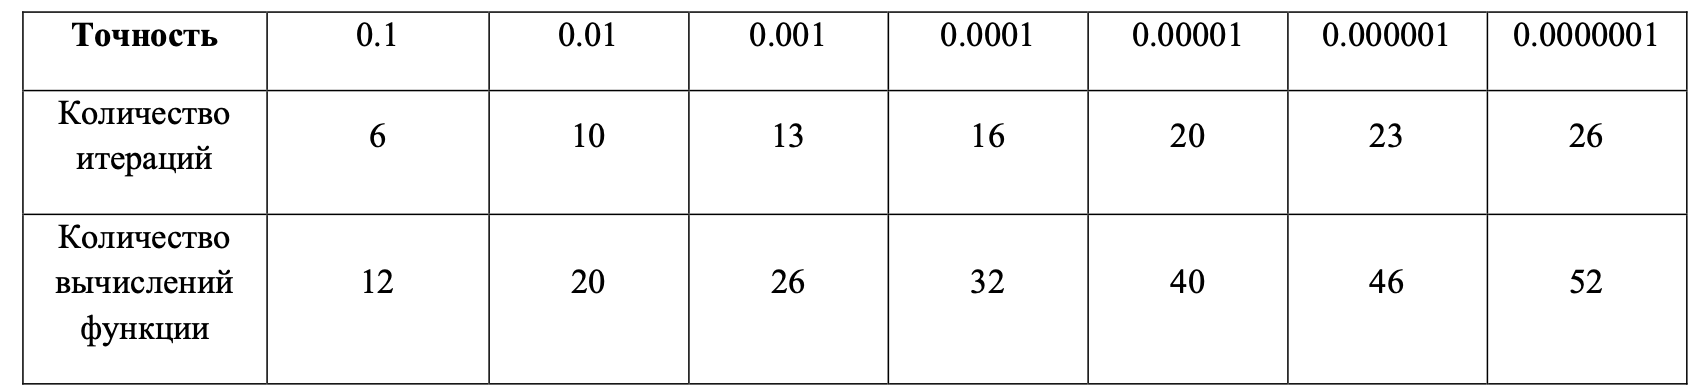

Как изменяется отрезок при переходе к следующей стадии:
В 2 раза

Тестирование на многомодальной функции $x -  \frac{1}{6}x^3 + \frac{1}{200}x^5$ дало локальный минимум

In [78]:
print(dichotomy(a, b, e, func2))

-1.5012548828125


#### Метод золотого сечения:

In [79]:
def golden_ration(a, b, e, func):
    ratio = (3 - math.sqrt(5)) / 2
    l, r = a, b
    prev = func(l + (r - l) * ratio)
    prev_left = True
    n = 1
    while r - l > e:
        x1 = l + (r - l) * ratio
        x2 = r - (r - l) * ratio
        if prev_left:
            f1 = prev
            f2 = func(x2)
        else:
            f1 = func(x1)
            f2 = prev
        n += 1
        if f1 < f2:
            r = x2
            prev = f1
            prev_left = False
        else:
            l = x1
            prev = f2
            prev_left = True
    #print("Golden ratio function calculations: ", n)        
    return (l + r) / 2

Описание алгоритма:
В отличие от метода дихотомии, где на каждой итерации метода функция вычислялась дважды, в методе золотого сечения точки выбираются не в окрестности середины, а так, чтобы они делили отрезок с коэффициентом золотого сечения. Тогда после уменьшения отрезка одна из точек для нового отрезка уже будет вычислена. Несмотря на то, что отрезок уменьшается медленнее, чем в методе дихотомии, значение функции вычисляется реже.

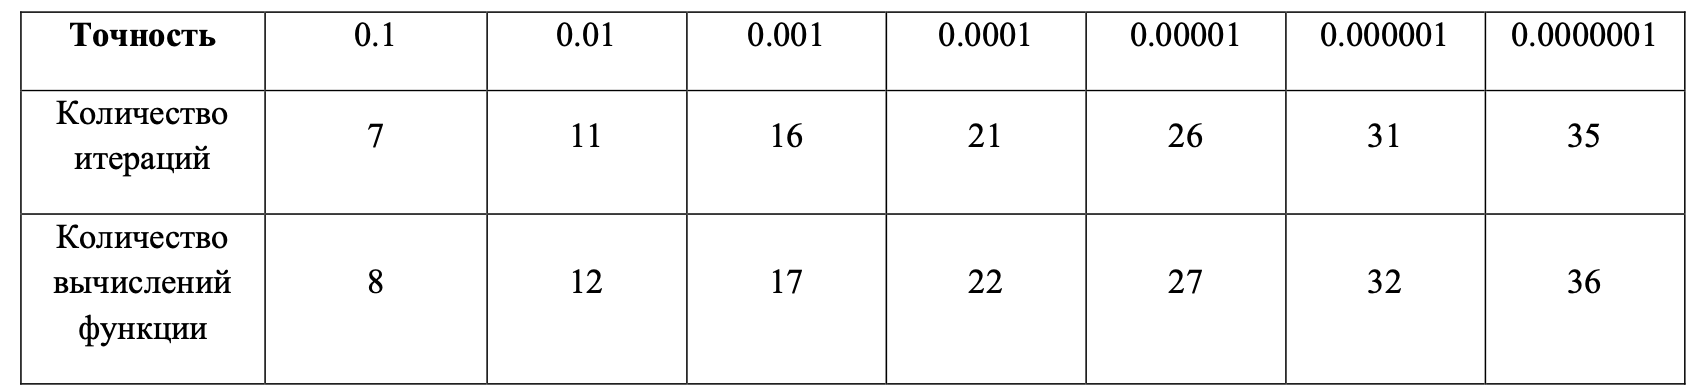

Как изменяется отрезок при переходе к следующей стадии:
В $\frac{\sqrt{5} + 1}{2}$ (золотое сечение) раз

Тестирование на многомодальной функции $x -  \frac{1}{6}x^3 + \frac{1}{200}x^5$ дало локальный минимум

In [80]:
print(golden_ration(a, b, e, func2))

-1.501752992830216


#### Метод Фибоначчи:

In [81]:
def fibonacci(a, b, e, func):
    fib0, fib1 = 1, 1
    n = 1
    nn = 2
    while fib1 < (b-a)/e:
        fib0, fib1 = fib1, fib0 + fib1
        n += 1
    fib0, fib1 = 1, 1
    fib = []
    fib.append(1)
    fib.append(1)
    for i in range(n - 1):
        fib0, fib1 = fib1, fib0 + fib1
        fib.append(fib1)
    x1 = a + (b - a) * (fib[n-2] / fib[n])
    x2 = a + (b - a) * fib[n-1] / fib[n]
    l, r = a, b
    f1, f2 = func(x1), func(x2)
    k = 1
    for i in range(n):
        if f1 > f2:
            l, r = x1, r
            x1 = x2
            x2 = l + (r - l) * (fib[n-k-1]/fib[n-k])
            if k == n-2:
                break
            f1, f2 = f2, func(x2)
        else:
            l, r = l, x2
            x2 = x1
            x1 = l + (r - l) * (fib[n-k-2]/fib[n-k])
            if k == n-2:
                break
            f1, f2 = func(x1), f1
        nn = nn+1
        k = k+1
    x2 = x1 + e / 2
    f2 = func(x2)
    if f1 < f2:
        l, r = l, x2
    else:
        l, r = x1, r
    #print("Fibonacci function calculations: ", nn+1)    
    return (l + r) / 2

Описание алгоритма:
Метод похож на золотое сечение, но в отличие от него, мы делим отрезок в соотношении соответствующих чисел Фибоначчи. Это позволяет в некоторых случаях уменьшить количество вычислений значения функции на 1.

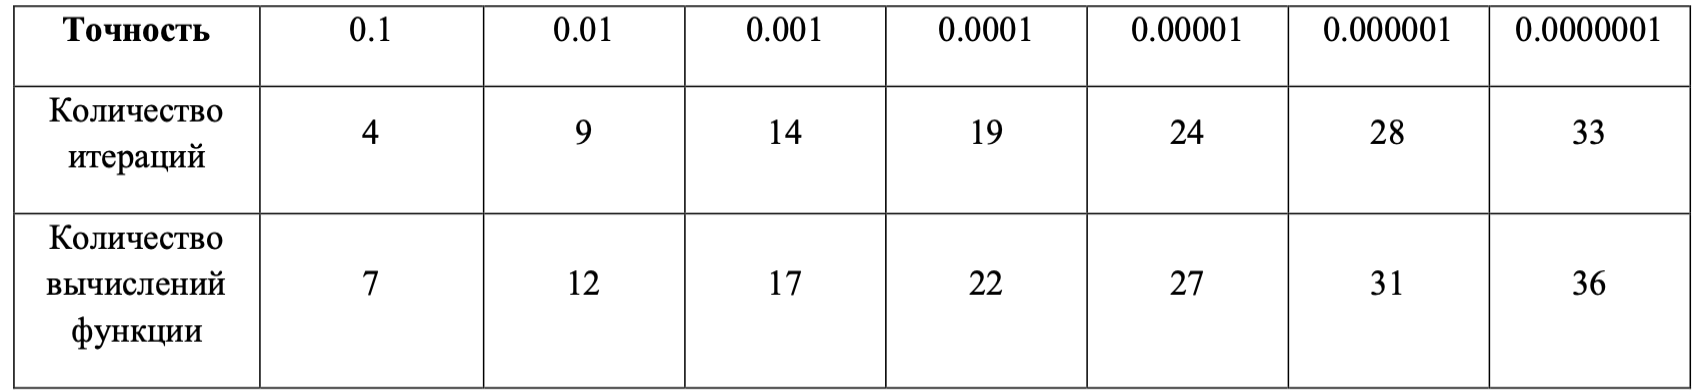

Как изменяется отрезок при переходе к следующей стадии:
На k-ой итерации в $\frac{F_{n-k}}{F_{n-k-1}}$  раз

Тестирование на многомодальной функции $x -  \frac{1}{6}x^3 + \frac{1}{200}x^5$ дало локальный минимум

In [82]:
print(fibonacci(a, b, e, func2))

-1.4991210739614997


#### Метод парабол:

In [83]:
def parabolic_u(x1, x2, x3, f1, f2, f3, sorted):
    arr = [[x1, f1], [x2, f2], [x3, f3]]
    if not sorted:
        arr.sort()
    l, x, r, f_l, f_x, f_r = arr[0][0], arr[1][0], arr[2][0], arr[0][1], arr[1][1], arr[2][1]
    return x - ((x - l) * (x - l) * (f_x - f_r) - (x - r) * (x - r) * (f_x - f_l)) / 2 / ((x - l) * (f_x - f_r) - (x - r) * (f_x - f_l))


def parabolic(a, b, e, func):
    l, r, x = a, b, a + (b - a) / 2
    f_l, f_r, f_x = func(l), func(r), func(x)
    n = 3
    while r - l > e:
        if f_l > f_x and f_x < f_r:
            u = parabolic_u(l, x, r, f_l, f_x, f_r, True)
        elif f_l <= f_x:
            u = l + e / 2
        else:
            u = r - e / 2
        if l < u < l + e / 2:
            u = l + e / 2
        elif r - e / 2 < u < r:
            u = r - e / 2
        f_u = func(u)
        n += 1
        if u > x:
            x, u = u, x
            f_x, f_u = f_u, f_x
        if f_u < f_x:
            #print((r - l) / (x - l))
            r, f_r, x, f_x = x, f_x, u, f_u
        else:
            #print((r - l) / (r - u))
            l, f_l = u, f_u
    #print("Parabolic function calculations: ", n)        
    return (l + r) / 2

Описание алгоритма:
В данном методе мы пытаемся аппроксимировать функцию параболой. На начальной итерации принимаем $a$, $b$ границами отрезка, $x$ — серединой отрезка. Подсчитаем в них значение функции. Затем повторяем следующие итерации до достижения заданной точности:
* Возьмем точки $a$, $b$, $x$ и их значения. Построим по этим трем точкам параболу и найдем её точку минимума $u$. Если $f_a < f_x < f_b$, то $u$ гарантировано будет лежать внутри $[a; b]$. Если $u < a + ξ$, то приравняем $u = a + ξ$. Если $u > b - ξ$, то $u = b - ξ$ (чтобы избежать ситуации, когда алгоритм изменяет исключительно левую/правую границу поиска, бесконечно сдвигая её к минимуму и не трогая другую границу)
* Подсчитаем значение функции $f_u$ в точке $u$. Теперь возьмем $u$ и $x$ (или $x$ и $u$ если $x < u$) за $x_1$ и $x_2$, сравним $f_{x_1}$ и $f_{x_2}$ и сократим интервал поиска.


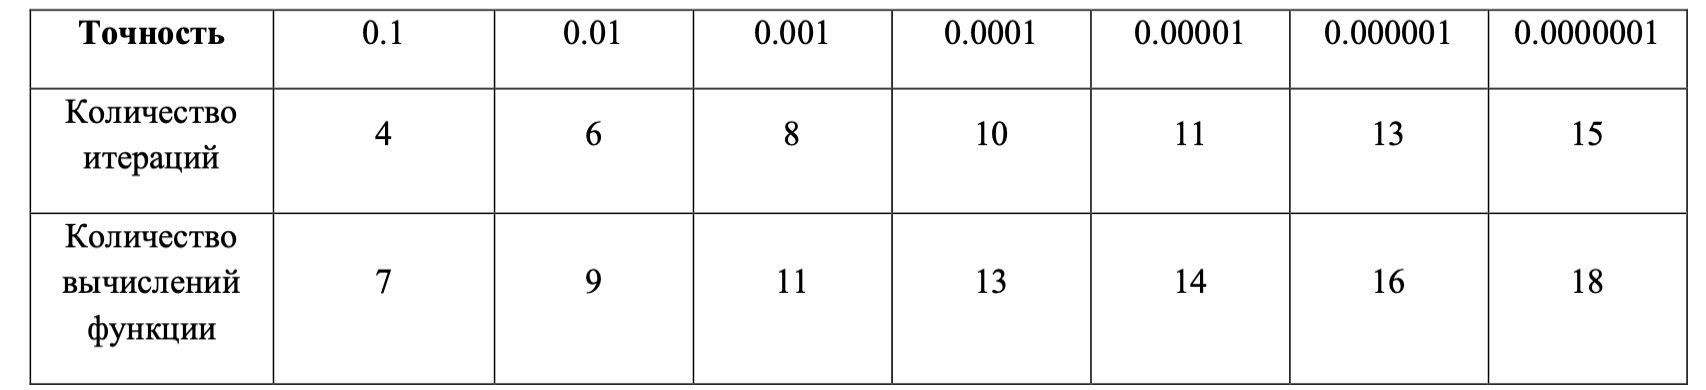

Как изменяется отрезок при переходе к следующей стадии:
Первые $n-1$ итерацию отрезок уменьшается с коэффициентом, стремящимся от 1.5 к 1. На последней итерации – в $k$ раз, где $k = \frac{2}{ξ}$

Тестирование на многомодальной функции $x -  \frac{1}{6}x^3 + \frac{1}{200}x^5$ не дало результата

In [84]:
print(parabolic(a, b, e, func2))

4.213451695397955


#### Комбинированный метод Брента:

In [85]:
def brents(a, c, e, func):
    ratio = (3 - math.sqrt(5)) / 2
    l, r, x = a, c, a + (c - a) * ratio
    w, v = x, x
    f_x = func(x)
    f_w, f_v = f_x, f_x
    n = 1
    d = r - l
    d_prev = d
    while r - l > e:
        g, d_prev = d_prev, d
        accepted = False
        if x != w and x != v and v != w and f_x != f_w and f_x != f_v and f_v != f_w:
            u = parabolic_u(x, w, v, f_x, f_w, f_v, False)
            if u - l > e / 2 and r - u > e / 2 and math.fabs(x - u) <= g / 2:
                accepted = True
                d = math.fabs(u - x)
        if not accepted:
            delta = r - l
            if l + delta / 2 < x:
                u = l + delta * ratio
                d = r - x
            else:
                u = r - delta * ratio
                d = x - l
        if math.fabs(x - u) < e / 2:
            u = x + math.copysign(e / 2, u - x)
        f_u = func(u)
        n += 1
        if u > x:
            x, u = u, x
            f_x, f_u = f_u, f_x
        if f_u < f_x:
            #print((r - l) / (x - l))
            r, x, f_x, w, f_w, v, f_v = x, u, f_u, x, f_x, w, f_w
        else:
            #print((r - l) / (r - u))
            l, x, w, f_w, v, f_v = u, x, u, f_u, w, f_w
    #print("Brent's function calculations: ", n)        
    return (l + r) / 2

Описание алгоритма:
В данном методе мы пытаемся аппроксимировать функцию параболой, однако в случае слишком больших/маленьких шагов вместо этого делим золотым сечением. На начальной итерации принимаем $k = 0,381966$, $a$ и $b$ - границами отрезка, $x = a + (b – a) * k, w = v = x$ — вторым минимумом и вторым минимумом предыдущие итерации соответственно. Подсчитаем в $x$ значения функции (соответственно и в $w, с, v$). Затем повторяем следующие итерации до достижения заданной точности:
* Проверим, различаются ли точки $x, w, v$ и значения функции в них. Если да:
    * Построим параболу по этим трем точкам и найдем её точку минимума $u$. Затем проверим:
        * Если $u$ отстоит от $l$ и $r$ хотя бы на $ξ$, а также длина получившегося шага $|x - u|$ не больше   двух длин пред-предыдущего шага, то принимаем точку $u$
	    * Если длина получившегося шага $|x - u|$ меньше $ξ$, поставим её равной $ξ$
	    * Если точка $u$ минимума параболы не принята, то найдем $u$ методом золотого сечения
	* Посмотрим, с какой стороны от середины отрезка лежит $x$, и поставим $u$ с обратной стороны на расстоянии $k * (b - a)$ от границы.
	* Далее, как и в остальных алгоритмах, возьмем $x_1$  и $x_2$, обновим границы поиска, а также $x, w, v$ и все значения функции в них

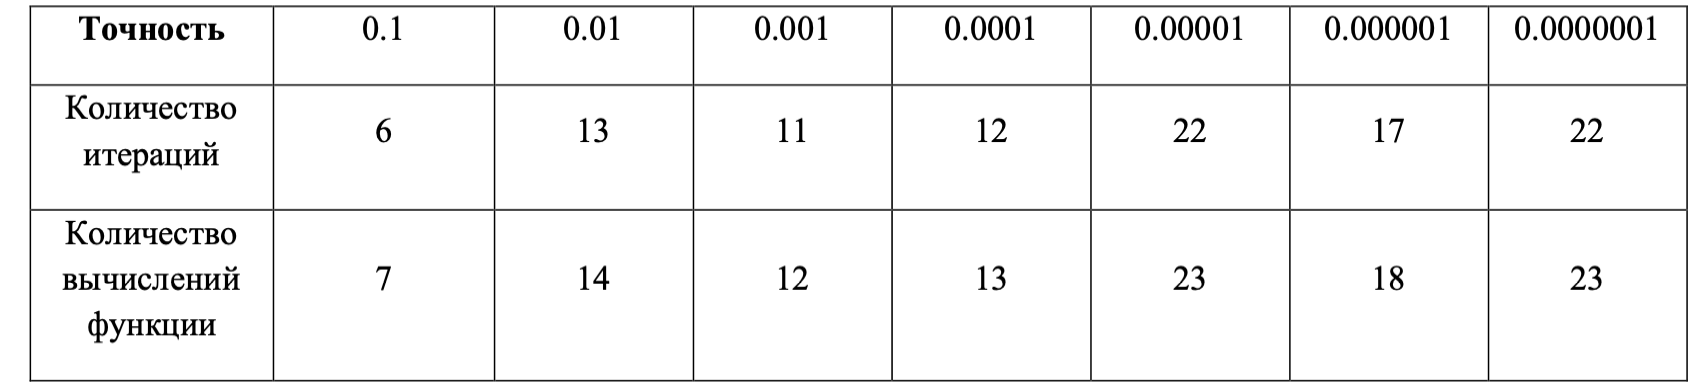

Как изменяется отрезок при переходе к следующей стадии:
При неприменимости параболического метода (принятии метода золотого сечения) для следующей операции – в $\frac{\sqrt{5} + 1}{2}$ (золотое сечение) раз. При применимости метода парабол – в около случайное число раз.

Тестирование на многомодальной функции $x -  \frac{1}{6}x^3 + \frac{1}{200}x^5$ не дало результата (так как не дал результата метод парабол)

In [86]:
print(brents(a, b, e, func2))

-1.5021391876828134


### Поиск локального минимума $e^{sin(x)}*x^2$

In [87]:
print('Метод дихотомии:', dichotomy(a, b, e, func1))
print('Метод золотого сечения:', golden_ration(a, b, e, func1))
print('Метод Фибоначчи:', fibonacci(a, b, e, func1))
print('Метод парабол:', parabolic(a, b, e, func1))
print('Комбинированный метод Брента:', brents(a, b, e, func1))

Метод дихотомии: -0.0005875651041667305
Метод золотого сечения: -0.00043824820755406163
Метод Фибоначчи: 0.0020947315096249332
Метод парабол: 0.0012398646514612719
Комбинированный метод Брента: -0.0003155111868283801


### Сравнение
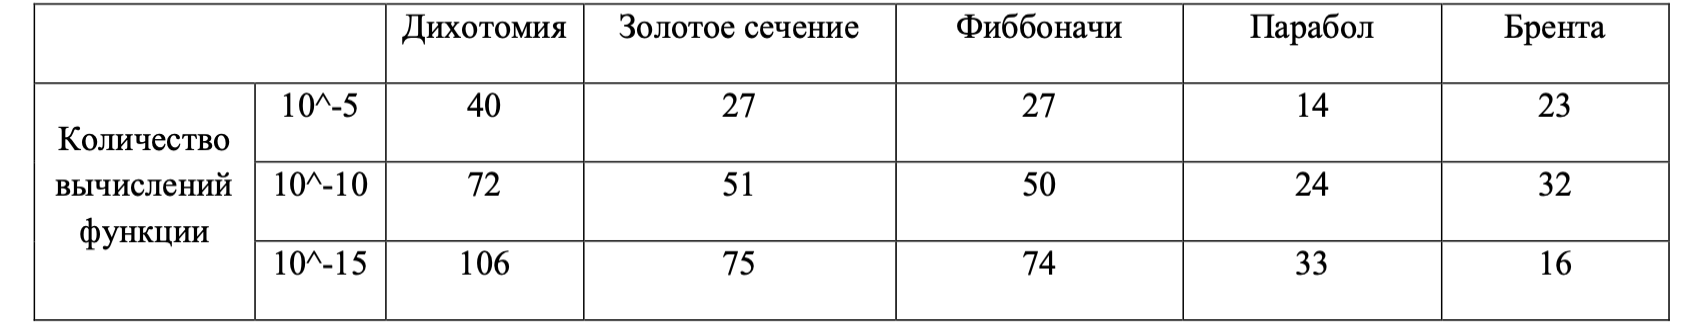

### Вывод
В течение работы были изучены методы дихотомии, золотого сечения, Фибоначчи, парабол, Брента. В случае данной функции при небольшой точности метод парабол оказывался самым эффективным, при большой точности самым эффективным является комбинированный метод Брента.

\begin{pmatrix}
  0 0\\
  0 0
\end{pmatrix}